In [1]:
from grader import refinementGrader_chain

In [2]:
query = "Can you help me improve the clarity and tone of this email?"
email_input = """
From: john.doe@example.com  
To: manager@company.com  
Subject: Meeting in the next week 

hey,  
just checking if u saw my last msg abt the meeting. lmk if 3pm works.  

thx  
"""

In [3]:
response = refinementGrader_chain.invoke({
    "email_input":email_input,
    "query":query
})

print(response)

content="I will use the RefinementGrader tool to assess the user's email and query." additional_kwargs={'id': 'c7edfe24-ef36-439b-9a45-c61a3bc6d5e1', 'finish_reason': 'TOOL_CALL', 'tool_plan': "I will use the RefinementGrader tool to assess the user's email and query.", 'tool_calls': [{'id': 'RefinementGrader_vdpg61xdcka1', 'type': 'function', 'function': {'name': 'RefinementGrader', 'arguments': '{"needingImprovement":"yes","ImprovementList":["Tone Improvement","Clarity Improvement","Grammar Improvement","Lacks professionalism","No introduction or closing"]}'}}], 'token_count': {'input_tokens': 1722.0, 'output_tokens': 89.0}} response_metadata={'id': 'c7edfe24-ef36-439b-9a45-c61a3bc6d5e1', 'finish_reason': 'TOOL_CALL', 'tool_plan': "I will use the RefinementGrader tool to assess the user's email and query.", 'tool_calls': [{'id': 'RefinementGrader_vdpg61xdcka1', 'type': 'function', 'function': {'name': 'RefinementGrader', 'arguments': '{"needingImprovement":"yes","ImprovementList":["T

In [4]:
type(response)

langchain_core.messages.ai.AIMessage

In [5]:
type(response.additional_kwargs)

dict

In [6]:
print(response.additional_kwargs["tool_calls"][0]["function"])

{'name': 'RefinementGrader', 'arguments': '{"needingImprovement":"yes","ImprovementList":["Tone Improvement","Clarity Improvement","Grammar Improvement","Lacks professionalism","No introduction or closing"]}'}


In [7]:
type(response.additional_kwargs["tool_calls"][0]["function"]["arguments"])

str

In [8]:
import json
output = json.loads(response.additional_kwargs["tool_calls"][0]["function"]["arguments"])
type(output)

dict

In [9]:
print("needing improvmenet:", output["needingImprovement"])
print("ImprovementList:", output["ImprovementList"])

needing improvmenet: yes
ImprovementList: ['Tone Improvement', 'Clarity Improvement', 'Grammar Improvement', 'Lacks professionalism', 'No introduction or closing']


In [10]:
improvement_list = output["ImprovementList"]

In [11]:
from generator import email_refiner_chain


In [12]:
refined_email = email_refiner_chain.invoke(
    {
        "email": email_input,
        "ImprovementList": improvement_list
    }
)

In [13]:
print(refined_email)

{'From': 'john.doe@example.com', 'To': 'manager@company.com', 'Subject': 'Meeting in the Next Week', 'Body': 'Dear Manager, \n\nI wanted to follow up on my previous message regarding our meeting. I was wondering if 3pm works for you? Please let me know your availability.\n\nThank you,\nJohn Doe'}


In [14]:
print("From:",refined_email["From"])
print("To:",refined_email["To"])
print("Subject:",refined_email["Subject"])
print("Body:",refined_email["Body"])

From: john.doe@example.com
To: manager@company.com
Subject: Meeting in the Next Week
Body: Dear Manager, 

I wanted to follow up on my previous message regarding our meeting. I was wondering if 3pm works for you? Please let me know your availability.

Thank you,
John Doe


In [15]:
from agentic_graph import compile_refinement_agent

refiner_agent = compile_refinement_agent()


Compiling workflow...


In [16]:
response = refiner_agent.invoke({
    "email": email_input,
    "query": query
})

In [17]:
print(response)

{'email': '\nFrom: john.doe@example.com  \nTo: manager@company.com  \nSubject: Meeting in the next week \n\nhey,  \njust checking if u saw my last msg abt the meeting. lmk if 3pm works.  \n\nthx  \n', 'query': 'Can you help me improve the clarity and tone of this email?', 'needingImprovement': 'yes', 'ImprovementList': ['Tone Improvement', 'Clarity Improvement', 'Grammar Improvement', 'Lacks professionalism', 'No introduction or closing'], 'refined_email': {'From': 'john.doe@example.com', 'To': 'manager@company.com', 'Subject': 'Meeting in the Next Week', 'Body': 'Dear Manager,\n\nI wanted to follow up on my previous message regarding our meeting. I was wondering if 3pm works for you. Please let me know your availability.\n\nThank you,\nJohn Doe'}}


In [19]:
print("From:",response["refined_email"]["From"])
print("To:",response["refined_email"]["To"])
print("Subject:",response["refined_email"]["Subject"])
print("Body:",response["refined_email"]["Body"])

From: john.doe@example.com
To: manager@company.com
Subject: Meeting in the Next Week
Body: Dear Manager,

I wanted to follow up on my previous message regarding our meeting. I was wondering if 3pm works for you. Please let me know your availability.

Thank you,
John Doe


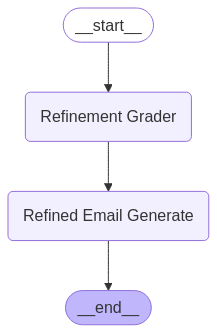

In [21]:
from IPython.display import Image, display
display(Image(refiner_agent.get_graph(xray=True).draw_mermaid_png()))